In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

X16 = pd.read_csv('X16.csv', sep=',', header='infer') 

# LinReg Logerror vs chaque variables 

In [65]:
X16.columns

Index(['Unnamed: 0', 'parcelid', 'logerror', 'transactiondate',
       'airconditioningtypeid', 'bathroomcnt', 'bedroomcnt',
       'buildingqualitytypeid', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'unitcnt', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock'],
      dtype='object')

In [66]:
X16.columns.values

array(['Unnamed: 0', 'parcelid', 'logerror', 'transactiondate',
       'airconditioningtypeid', 'bathroomcnt', 'bedroomcnt',
       'buildingqualitytypeid', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'propertylandusetypeid', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'unitcnt',
       'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock'], dtype=object)

Distinguons entre les vatiables discretes et les variables continues.

In [118]:
features = pd.DataFrame(X16.columns[4:].values, columns=['col_name'])

In [124]:
discrete = [
    'airconditioningtypeid', 
    'bathroomcnt', 
    'bedroomcnt',
    'buildingqualitytypeid', 
    'calculatedbathnbr',
    'fips',
    'fullbathcnt', 
    'garagecarcnt', 
    'heatingorsystemtypeid', 
    'propertycountylandusecode',
    'propertylandusetypeid', 
    'propertyzoningdesc',
    'rawcensustractandblock', 
    'regionidcity', 
    'regionidcounty',
    'regionidneighborhood', 
    'regionidzip', 
    'roomcnt', 
    'unitcnt',
    'yearbuilt', 
    'numberofstories', 
    'assessmentyear', 
    'censustractandblock'
]
continu = [
    'calculatedfinishedsquarefeet', 
    'finishedsquarefeet12', 
    'garagetotalsqft',
    'latitude', 
    'longitude',
    'lotsizesquarefeet', 
    'structuretaxvaluedollarcnt',
    'taxvaluedollarcnt',
    'landtaxvaluedollarcnt',
    'taxamount', 
]

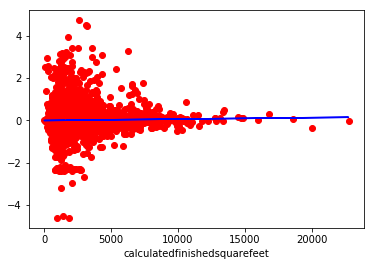

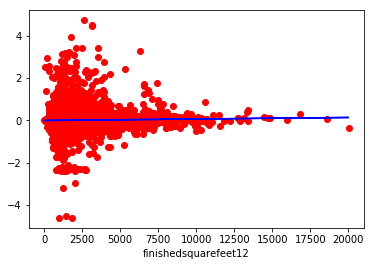

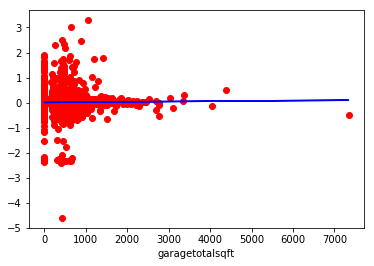

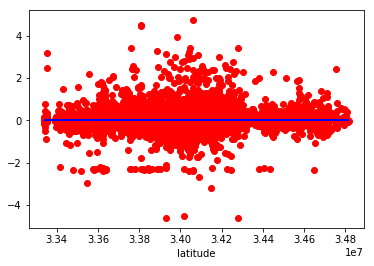

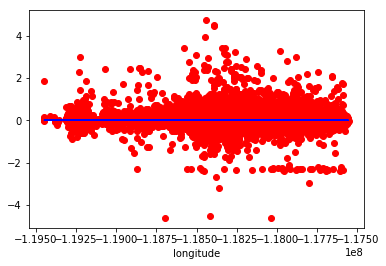

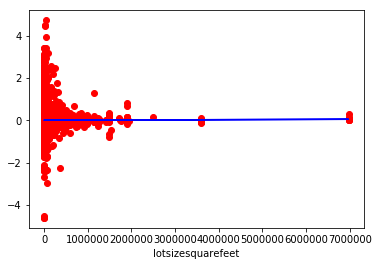

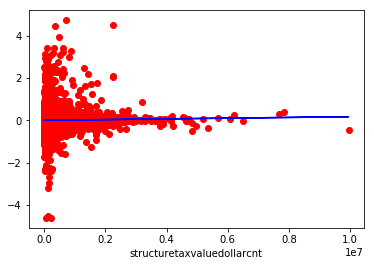

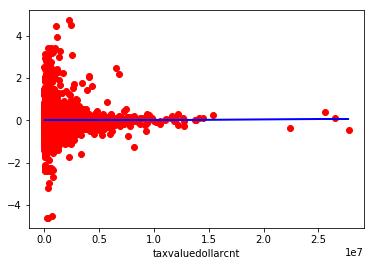

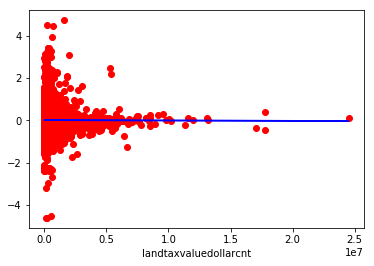

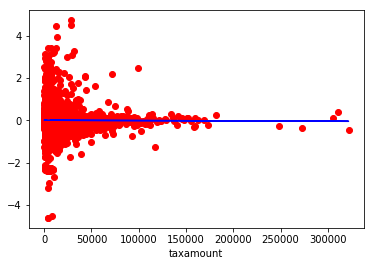

In [123]:
i=0

for feature in continu:    
    data = {
        'err': X16['logerror'].values,
        'feature': X16[feature].values
    }
    X = pd.DataFrame(
        data=data,
        index=X16['parcelid'].values, 
    )

    X.dropna(inplace=True)
    y = X.err.values
    x = X['feature'].values.reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(x, y)
    
    fig = plt.figure(1)
    plt.plot(x, y, 'r.', markersize=12)
    plt.plot(x, lr.predict(x), 'b-')
    plt.xlabel(feature)
    i+=1
    plt.show()


In [131]:
data ={'err': X16['logerror'].values}
for feature in continu:
    data[feature] = X16[feature].values

In [142]:
X = pd.DataFrame(
    data=data,
    index=X16['parcelid'].values, 
)
X.dropna(inplace=True)
y = X.err.values
x = X.iloc[:,1:].values
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))
print("test set score: %f" % lr.RMSE(X_test, y_test))

training set score: 0.004327
test set score: 0.001960


In [ ]:
print("test set score: %f" % lr.RMSE(X_test, y_test))